In [2]:
from pathlib import Path
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import shapiro

from eff.analysis import mann_whitney_test, wilcoxon_signed_rank_test, get_significance_level
from eff.analysis.plotting import set_lang_ax
from eff.util.util import load_results

In [3]:
base_path = Path("./out/nelex_unique")
fontsize=18

logodds_order = {}
logodds_dist = {}

### VH Languagess

Finnish -> Hungarian -> Turkish -> Manchu -> Khalkha Mongoliab

In [4]:
dataset, res, criterion, model = load_results(base_path, 'fin')
# harmonic groups
front_vowels = ['æ', 'œ', 'ʏ', 'y']
back_vowels = ['ɔ', 'u', 'ʊ', 'ɑ']
neutral_vowels = ['i', 'ɛ']
# model probe front harmony (feature surprisal)
clts_ds = dataset['clts']
bipa = clts_ds.bipa
output_alphabet = clts_ds.output_alphabet
logprobs = res['unmasked']['logprobs']
targets = res['unmasked']['targets']
target_indices = res['unmasked']['indices']

front_indices = [output_alphabet.char2idx(v) for v in front_vowels]
back_indices = [output_alphabet.char2idx(v) for v in back_vowels]
neutral_indices = [output_alphabet.char2idx(v) for v in neutral_vowels]


logodds_front_fin = []
logodds_back_fin = []


for indices_word, targets_word, logprobs_word in zip(target_indices, targets, logprobs):
    vowel_indices = [targets_word[idx] for idx in indices_word]
    if len(vowel_indices) >= 2:
        for i in range(len(vowel_indices)-1, 0, -1):
            i1, i2 = vowel_indices[i-1], vowel_indices[i]
            # need char to determine harmonic group
            v1, v2 = output_alphabet.idx2char(i1), output_alphabet.idx2char(i2)
            target_idx = indices_word[i]

            if not clts_ds.bipa[v1].type == 'diphthong' \
            and not clts_ds.bipa[v2].type == 'diphthong':

                if v1 in front_vowels:
                    target_logprobs = logprobs_word[target_idx]
                    #print(sum([2**(-l) for i, l in enumerate(target_logprobs)]))
                    p_front = sum([2**(-l) for i, l in enumerate(target_logprobs) if i in front_indices + neutral_indices])
                    p_back = sum([2**(-l) for i, l in enumerate(target_logprobs) if i in back_indices])
                    p_front = p_front/(p_front+p_back)
                    p_back = p_back/(p_front+p_back)
                    logodds = np.log(p_front/(p_back))
                    #print(logodds)
                    logodds_front_fin.append(logodds)
                elif v1 in back_vowels:
                    target_logprobs = logprobs_word[target_idx]
                    #print(sum([2**(-l) for i, l in enumerate(target_logprobs)]))
                    p_front = sum([2**(-l) for i, l in enumerate(target_logprobs) if i in front_indices])
                    p_back = sum([2**(-l) for i, l in enumerate(target_logprobs) if i in back_indices])
                    logodds = np.log(p_back/(p_front))
                    #print(logodds)
                    logodds_back_fin.append(logodds)

mean_logodds_front = sum(logodds_front_fin)/len(logodds_front_fin)
mean_logodds_back = sum(logodds_back_fin)/len(logodds_back_fin)

print(mean_logodds_front)
print(mean_logodds_back)

logodds_order['fin_front'] = mean_logodds_front
logodds_order['fin_back'] = mean_logodds_back
logodds_dist['fin_front'] = logodds_front_fin
logodds_dist['fin_back'] = logodds_back_fin

1.2556555753085756
0.5250806621313859


In [5]:
dataset, res, criterion, model = load_results(base_path, 'hun')
# harmonic groups. if neutral vowels are grouped with front vowels, they need to be exlcuded when
# calculating feature surprisal after +BACK vowels, since they are still neutral in that condition.
front_vowels = ['ø', 'y']
back_vowels = ['o', 'u', 'ɒ', 'a']
neutral_vowels = ['i', 'ɛ', 'e']

# model probe front harmony (feature surprisal)
clts_ds = dataset['clts']
bipa = clts_ds.bipa
output_alphabet = clts_ds.output_alphabet
logprobs = res['unmasked']['logprobs']
targets = res['unmasked']['targets']
target_indices = res['unmasked']['indices']

front_indices = [output_alphabet.char2idx(v) for v in front_vowels]
back_indices = [output_alphabet.char2idx(v) for v in back_vowels]
neutral_indices = [output_alphabet.char2idx(v) for v in neutral_vowels]


logodds_front_hun = []
logodds_back_hun = []


for indices_word, targets_word, logprobs_word in zip(target_indices, targets, logprobs):
    vowel_indices = [targets_word[idx] for idx in indices_word]
    if len(vowel_indices) >= 2:
        for i in range(len(vowel_indices)-1, 0, -1):
            i1, i2 = vowel_indices[i-1], vowel_indices[i]
            # need char to determine harmonic group
            v1, v2 = output_alphabet.idx2char(i1), output_alphabet.idx2char(i2)
            target_idx = indices_word[i]

            if not clts_ds.bipa[v1].type == 'diphthong' \
            and not clts_ds.bipa[v2].type == 'diphthong':

                if v1 in front_vowels:
                    target_logprobs = logprobs_word[target_idx]
                    #print(sum([2**(-l) for i, l in enumerate(target_logprobs)]))
                    p_front = sum([2**(-l) for i, l in enumerate(target_logprobs) if i in front_indices + neutral_indices])
                    p_back = sum([2**(-l) for i, l in enumerate(target_logprobs) if i in back_indices])
                    p_front = p_front/(p_front+p_back)
                    p_back = p_back/(p_front+p_back)
                    logodds = np.log(p_front/(p_back))
                    #print(logodds)
                    logodds_front_hun.append(logodds)
                elif v1 in back_vowels:
                    target_logprobs = logprobs_word[target_idx]
                    #print(sum([2**(-l) for i, l in enumerate(target_logprobs)]))
                    p_front = sum([2**(-l) for i, l in enumerate(target_logprobs) if i in front_indices])
                    p_back = sum([2**(-l) for i, l in enumerate(target_logprobs) if i in back_indices])
                    logodds = np.log(p_back/(p_front))
                    #print(logodds)
                    logodds_back_hun.append(logodds)

mean_logodds_front = sum(logodds_front_hun)/len(logodds_front_hun)
mean_logodds_back = sum(logodds_back_hun)/len(logodds_back_hun)

print(mean_logodds_front)
print(mean_logodds_back)

logodds_order['hun_front'] = mean_logodds_front
logodds_order['hun_back'] = mean_logodds_back
logodds_dist['hun_front'] = logodds_front_hun
logodds_dist['hun_back'] = logodds_back_hun

0.9759302183384684
1.5157589819853823


In [6]:
dataset, res, criterion, model = load_results(base_path, 'tur')
# harmonic groups
front_vowels = ['œ', 'i', 'ɛ', 'y']
back_vowels = ['o', 'u', 'a', 'ɯ']
rounded_vowels = ['o', 'œ', 'y', 'u']
unrounded_vowels = ['i', 'ɛ', 'a', 'ɯ']

# model probe front harmony (feature surprisal)
clts_ds = dataset['clts']
bipa = clts_ds.bipa
output_alphabet = clts_ds.output_alphabet
logprobs = res['unmasked']['logprobs']
targets = res['unmasked']['targets']
target_indices = res['unmasked']['indices']


# +-BACK
front_indices = [output_alphabet.char2idx(v) for v in front_vowels]
back_indices = [output_alphabet.char2idx(v) for v in back_vowels]
print(front_indices)
print(back_indices)


logodds_front_tur = []
logodds_back_tur = []


for indices_word, targets_word, logprobs_word in zip(target_indices, targets, logprobs):
    vowel_indices = [targets_word[idx] for idx in indices_word]
    if len(vowel_indices) >= 2:
        for i in range(len(vowel_indices)-1, 0, -1):
            i1, i2 = vowel_indices[i-1], vowel_indices[i]
            # need char to determine harmonic group
            v1, v2 = output_alphabet.idx2char(i1), output_alphabet.idx2char(i2)
            target_idx = indices_word[i]

            if not clts_ds.bipa[v1].type == 'diphthong' \
            and not clts_ds.bipa[v2].type == 'diphthong':

                if v1 in front_vowels:
                    target_logprobs = logprobs_word[target_idx]
                    #print(sum([2**(-l) for i, l in enumerate(target_logprobs)]))
                    p_front = sum([2**(-l) for i, l in enumerate(target_logprobs) if i in front_indices])
                    p_back = sum([2**(-l) for i, l in enumerate(target_logprobs) if i in back_indices])
                    p_front = p_front/(p_front+p_back)
                    p_back = p_back/(p_front+p_back)
                    logodds = np.log(p_front/(p_back))
                    #print(logodds)
                    logodds_front_tur.append(logodds)
                elif v1 in back_vowels:
                    target_logprobs = logprobs_word[target_idx]
                    #print(sum([2**(-l) for i, l in enumerate(target_logprobs)]))
                    p_front = sum([2**(-l) for i, l in enumerate(target_logprobs) if i in front_indices])
                    p_back = sum([2**(-l) for i, l in enumerate(target_logprobs) if i in back_indices])
                    logodds = np.log(p_back/(p_front))
                    #print(logodds)
                    logodds_back_tur.append(logodds)

mean_logodds_front = sum(logodds_front_tur)/len(logodds_front_tur)
mean_logodds_back = sum(logodds_back_tur)/len(logodds_back_tur)

print(mean_logodds_front)
print(mean_logodds_back)

logodds_order['tur_front'] = mean_logodds_front
logodds_order['tur_back'] = mean_logodds_back
logodds_dist['tur_front'] = logodds_front_tur
logodds_dist['tur_back'] = logodds_back_tur


## +-ROUND
# model probe roundedness harmony (feature surprisal)
logodds_round_tur = []
logodds_unround_tur = []

rounded_indices = [output_alphabet.char2idx(v) for v in rounded_vowels]
unrounded_indices = [output_alphabet.char2idx(v) for v in unrounded_vowels]


for indices_word, targets_word, logprobs_word in zip(target_indices, targets, logprobs):
    vowel_indices = [targets_word[idx] for idx in indices_word]
    if len(vowel_indices) >= 2:
        for i in range(len(vowel_indices)-1, 0, -1):
            idx = vowel_indices[i]
            prev_idx = vowel_indices[i-1]
            target_idx = indices_word[i] # first index of the logprobs
            # need char to determine harmonic group
            vowel = output_alphabet.idx2char(idx)
            prev_vowel = output_alphabet.idx2char(prev_idx)

            if not clts_ds.bipa[vowel].type == 'diphthong' \
            and not clts_ds.bipa[vowel].type == 'diphthong':

                if prev_vowel in rounded_vowels:
                    target_logprobs = logprobs_word[target_idx]
                    p_round = sum([2**(-l) for i, l in enumerate(target_logprobs) if i in rounded_indices])
                    p_unround = sum([2**(-l) for i, l in enumerate(target_logprobs) if i in unrounded_indices])
                    # normalize probabilities because some probability mass is on the mask, eos and pad indices
                    p_round = p_round/(p_round+p_unround)
                    p_unround = p_unround/(p_round+p_unround)
                    logodds = np.log(p_round/p_unround)
                    logodds_round_tur.append(logodds)
                elif prev_vowel in unrounded_vowels:
                    target_logprobs = logprobs_word[target_idx]
                    p_unround = sum([2**(-l) for i, l in enumerate(target_logprobs) if i in unrounded_indices])
                    p_round = sum([2**(-l) for i, l in enumerate(target_logprobs) if i in rounded_indices])
                    p_round = p_round/(p_round+p_unround)
                    p_unround = p_unround/(p_round+p_unround)
                    logodds = np.log(p_unround/p_round)
                    logodds_unround_tur.append(logodds)

mean_logodds_round = sum(logodds_round_tur)/len(logodds_round_tur)
mean_logodds_unround = sum(logodds_unround_tur)/len(logodds_unround_tur)
print(mean_logodds_round)
print(mean_logodds_unround)

logodds_order['tur_round'] = mean_logodds_round
logodds_order['tur_unround'] = mean_logodds_unround
logodds_dist['tur_round'] = logodds_round_tur
logodds_dist['tur_unround'] = logodds_unround_tur

[8, 10, 6, 9]
[7, 3, 4, 5]
2.23326004632516
2.823132950285949
0.734508056896815
2.1963021806744614


In [7]:
dataset, res, criterion, model = load_results(base_path, 'mnc')
front_vowels = ['ɤ']
back_vowels = ['a', 'ɔ', 'ʊ']
neutral_vowels = ['i', 'u']

# model probe front harmony (feature surprisal)
clts_ds = dataset['clts']
bipa = clts_ds.bipa
output_alphabet = clts_ds.output_alphabet
logprobs = res['unmasked']['logprobs']
targets = res['unmasked']['targets']
target_indices = res['unmasked']['indices']

front_indices = [output_alphabet.char2idx(v) for v in front_vowels]
back_indices = [output_alphabet.char2idx(v) for v in back_vowels]
neutral_indices = [output_alphabet.char2idx(v) for v in neutral_vowels]


logodds_front_mnc = []
logodds_back_mnc = []


for indices_word, targets_word, logprobs_word in zip(target_indices, targets, logprobs):
    vowel_indices = [targets_word[idx] for idx in indices_word]
    if len(vowel_indices) >= 2:
        for i in range(len(vowel_indices)-1, 0, -1):
            i1, i2 = vowel_indices[i-1], vowel_indices[i]
            # need char to determine harmonic group
            v1, v2 = output_alphabet.idx2char(i1), output_alphabet.idx2char(i2)
            target_idx = indices_word[i]

            if not clts_ds.bipa[v1].type == 'diphthong' \
            and not clts_ds.bipa[v2].type == 'diphthong':

                if v1 in front_vowels:
                    target_logprobs = logprobs_word[target_idx]
                    #print(sum([2**(-l) for i, l in enumerate(target_logprobs)]))
                    p_front = sum([2**(-l) for i, l in enumerate(target_logprobs) if i in front_indices + neutral_indices])
                    p_back = sum([2**(-l) for i, l in enumerate(target_logprobs) if i in back_indices])
                    p_front = p_front/(p_front+p_back)
                    p_back = p_back/(p_front+p_back)
                    logodds = np.log(p_front/(p_back))
                    #print(logodds)
                    logodds_front_mnc.append(logodds)
                elif v1 in back_vowels:
                    target_logprobs = logprobs_word[target_idx]
                    #print(sum([2**(-l) for i, l in enumerate(target_logprobs)]))
                    p_front = sum([2**(-l) for i, l in enumerate(target_logprobs) if i in front_indices])
                    p_back = sum([2**(-l) for i, l in enumerate(target_logprobs) if i in back_indices])
                    logodds = np.log(p_back/(p_front))
                    #print(logodds)
                    logodds_back_mnc.append(logodds)

mean_logodds_front = sum(logodds_front_mnc)/len(logodds_front_mnc)
mean_logodds_back = sum(logodds_back_mnc)/len(logodds_back_mnc)

print(mean_logodds_front)
print(mean_logodds_back)

logodds_order['mnc_front'] = mean_logodds_front
logodds_order['mnc_back'] = mean_logodds_back
logodds_dist['mnc_front'] = logodds_front_mnc
logodds_dist['mnc_back'] = logodds_back_mnc

3.038426062008355
1.8493390044854245


In [8]:
dataset, res, criterion, model = load_results(base_path, 'khk')
# +-BACK
# harmonic groups
front_vowels = ['e', 'u', 'o'] # +ATR
back_vowels = ['a', 'ʊ', 'ɔ'] # -ATR
neutral_vowels = ['i']

unrounded_vowels = ['e', 'a', 'i']
rounded_vowels = ['o', 'ɔ']
neutral_vowels = ['u', 'ʊ', 'ɵ']


# model probe front harmony (feature surprisal)
clts_ds = dataset['clts']
bipa = clts_ds.bipa
output_alphabet = clts_ds.output_alphabet
logprobs = res['unmasked']['logprobs']
targets = res['unmasked']['targets']
target_indices = res['unmasked']['indices']

front_indices = [output_alphabet.char2idx(v) for v in front_vowels]
back_indices = [output_alphabet.char2idx(v) for v in back_vowels]
neutral_indices = [output_alphabet.char2idx(v) for v in neutral_vowels]

rounded_indices = [output_alphabet.char2idx(v) for v in rounded_vowels]
unrounded_indices = [output_alphabet.char2idx(v) for v in unrounded_vowels]
neutral_indices = [output_alphabet.char2idx(v) for v in neutral_vowels]

logodds_front_khk = []
logodds_back_khk = []


for indices_word, targets_word, logprobs_word in zip(target_indices, targets, logprobs):
    vowel_indices = [targets_word[idx] for idx in indices_word]
    if len(vowel_indices) >= 2:
        for i in range(len(vowel_indices)-1, 0, -1):
            i1, i2 = vowel_indices[i-1], vowel_indices[i]
            # need char to determine harmonic group
            v1, v2 = output_alphabet.idx2char(i1), output_alphabet.idx2char(i2)
            target_idx = indices_word[i]

            if not clts_ds.bipa[v1].type == 'diphthong' \
            and not clts_ds.bipa[v2].type == 'diphthong':

                if v1 in front_vowels:
                    target_logprobs = logprobs_word[target_idx]
                    #print(sum([2**(-l) for i, l in enumerate(target_logprobs)]))
                    p_front = sum([2**(-l) for i, l in enumerate(target_logprobs) if i in front_indices + neutral_indices])
                    p_back = sum([2**(-l) for i, l in enumerate(target_logprobs) if i in back_indices])
                    p_front = p_front/(p_front+p_back)
                    p_back = p_back/(p_front+p_back)
                    logodds = np.log(p_front/(p_back))
                    #print(logodds)
                    logodds_front_khk.append(logodds)
                elif v1 in back_vowels:
                    target_logprobs = logprobs_word[target_idx]
                    #print(sum([2**(-l) for i, l in enumerate(target_logprobs)]))
                    p_front = sum([2**(-l) for i, l in enumerate(target_logprobs) if i in front_indices])
                    p_back = sum([2**(-l) for i, l in enumerate(target_logprobs) if i in back_indices])
                    logodds = np.log(p_back/(p_front))
                    #print(logodds)
                    logodds_back_khk.append(logodds)

mean_logodds_front = sum(logodds_front_khk)/len(logodds_front_khk)
mean_logodds_back = sum(logodds_back_khk)/len(logodds_back_khk)

print(mean_logodds_front)
print(mean_logodds_back)

logodds_order['khk_atr'] = mean_logodds_front
logodds_order['khk_natr'] = mean_logodds_back
logodds_dist['khk_atr'] = logodds_front_khk
logodds_dist['khk_natr'] = logodds_back_khk

## +-ROUND
# model probe roundedness harmony (feature surprisal)
logodds_round_khk = []
logodds_unround_khk = []

rounded_indices = [output_alphabet.char2idx(v) for v in rounded_vowels]
unrounded_indices = [output_alphabet.char2idx(v) for v in unrounded_vowels]


for indices_word, targets_word, logprobs_word in zip(target_indices, targets, logprobs):
    vowel_indices = [targets_word[idx] for idx in indices_word]
    if len(vowel_indices) >= 2:
        for i in range(len(vowel_indices)-1, 0, -1):
            idx = vowel_indices[i]
            prev_idx = vowel_indices[i-1]
            target_idx = indices_word[i] # first index of the logprobs
            # need char to determine harmonic group
            vowel = output_alphabet.idx2char(idx)
            prev_vowel = output_alphabet.idx2char(prev_idx)

            if not clts_ds.bipa[vowel].type == 'diphthong' \
            and not clts_ds.bipa[vowel].type == 'diphthong':

                if prev_vowel in rounded_vowels:
                    target_logprobs = logprobs_word[target_idx]
                    p_round = sum([2**(-l) for i, l in enumerate(target_logprobs) if i in rounded_indices])
                    p_unround = sum([2**(-l) for i, l in enumerate(target_logprobs) if i in unrounded_indices])
                    # normalize probabilities because some probability mass is on the mask, eos and pad indices
                    p_round = p_round/(p_round+p_unround)
                    p_unround = p_unround/(p_round+p_unround)
                    logodds = np.log(p_round/p_unround)
                    logodds_round_khk.append(logodds)
                elif prev_vowel in unrounded_vowels:
                    target_logprobs = logprobs_word[target_idx]
                    p_unround = sum([2**(-l) for i, l in enumerate(target_logprobs) if i in unrounded_indices])
                    p_round = sum([2**(-l) for i, l in enumerate(target_logprobs) if i in rounded_indices])
                    p_round = p_round/(p_round+p_unround)
                    p_unround = p_unround/(p_round+p_unround)
                    logodds = np.log(p_unround/p_round)
                    logodds_unround_khk.append(logodds)

mean_logodds_round = sum(logodds_round_khk)/len(logodds_round_khk)
mean_logodds_unround = sum(logodds_unround_khk)/len(logodds_unround_khk)
print(mean_logodds_round)
print(mean_logodds_unround)

logodds_order['khk_round'] = mean_logodds_round
logodds_order['khk_unround'] = mean_logodds_unround
logodds_dist['khk_round'] = logodds_round_khk
logodds_dist['khk_unround'] = logodds_unround_khk

1.7947491543987883
0.4745361365029779
0.26490066382531624
0.8473899982817066


### Non-VH Languages

In [9]:
non_vh_langs =  ['arb', 'ain', 'ekk', 'hye', 'eus']

id2name = dict(
    fin="Finnish", arb="Arabic", 
    tur="Turkish", ain="Ainu", 
    mnc="Manchu", ekk="Estonian", 
    hun="Hungarian", hye="Armenian", 
    khk="Khalkha Mongolian", eus="Basque"
)

In [10]:
for lang_id in non_vh_langs:
    # load results
    dataset, res, criterion, model = load_results(base_path, lang_id)
    clts_ds = dataset['clts']
    bipa = clts_ds.bipa
    output_alphabet = clts_ds.output_alphabet
    logprobs = res['unmasked']['logprobs']
    targets = res['unmasked']['targets']
    target_indices = res['unmasked']['indices']

    # +-BACK
    # model probe front harmony 
    front_vowels = [v for v in output_alphabet.symbols if bipa[v].type == 'vowel' and 'front' in bipa[v].featureset] 
    back_vowels = [v for v in output_alphabet.symbols if bipa[v].type == 'vowel' and 'back' in bipa[v].featureset] 

    front_indices = [output_alphabet.char2idx(v) for v in front_vowels]
    back_indices = [output_alphabet.char2idx(v) for v in back_vowels]
    logodds_front = []
    logodds_back = []
    for indices_word, targets_word, logprobs_word in zip(target_indices, targets, logprobs):
        vowel_indices = [targets_word[idx] for idx in indices_word]
        if len(vowel_indices) >= 2:
            for i in range(len(vowel_indices)-1, 0, -1):
                idx = vowel_indices[i]
                prev_idx = vowel_indices[i-1]
                target_idx = indices_word[i] # first index of the logprobs
                # need char to determine harmonic group
                vowel = output_alphabet.idx2char(idx)
                prev_vowel = output_alphabet.idx2char(prev_idx)

                fset1 = clts_ds.bipa[vowel].featureset
                fset2 = clts_ds.bipa[prev_vowel].featureset

                if not clts_ds.bipa[vowel].type == 'diphthong' \
                and not clts_ds.bipa[vowel].type == 'diphthong':

                    if prev_vowel in front_vowels:
                        target_logprobs = logprobs_word[target_idx]
                        #print(sum([2**(-l) for i, l in enumerate(target_logprobs)]))
                        p_front = sum([2**(-l) for i, l in enumerate(target_logprobs) if i in front_indices])
                        p_back = sum([2**(-l) for i, l in enumerate(target_logprobs) if i in back_indices])
                        p_front = p_front/(p_front+p_back)
                        p_back = p_back/(p_front+p_back)
                        logodds = np.log(p_front/(p_back))
                        #print(logodds)
                        logodds_front.append(logodds)
                    elif prev_vowel in back_vowels:
                        target_logprobs = logprobs_word[target_idx]
                        #print(sum([2**(-l) for i, l in enumerate(target_logprobs)]))
                        p_front = sum([2**(-l) for i, l in enumerate(target_logprobs) if i in front_indices])
                        p_back = sum([2**(-l) for i, l in enumerate(target_logprobs) if i in back_indices])
                        logodds = np.log(p_back/(p_front))
                        #print(logodds)
                        logodds_back.append(logodds)

    mean_logodds_front = sum(logodds_front)/len(logodds_front)
    mean_logodds_back = sum(logodds_back)/len(logodds_back)
    logodds_order['{}_front'.format(lang_id)] = mean_logodds_front
    logodds_order['{}_back'.format(lang_id)] = mean_logodds_back
    logodds_dist['{}_front'.format(lang_id)] = logodds_front_khk
    logodds_dist['{}_back'.format(lang_id)] = logodds_back_khk

    # +- ROUND
    logodds_round = []
    logodds_unround = []

    # model probe roundedness harmony (feature surprisal)
    rounded_vowels = [v for v in output_alphabet.symbols if bipa[v].type == 'vowel' and 'rounded' in bipa[v].featureset] 
    unrounded_vowels = [v for v in output_alphabet.symbols if bipa[v].type == 'vowel' and 'unrounded' in bipa[v].featureset] 

    rounded_indices = [output_alphabet.char2idx(v) for v in front_vowels]
    unrounded_indices = [output_alphabet.char2idx(v) for v in back_vowels]



    for indices_word, targets_word, logprobs_word in zip(target_indices, targets, logprobs):
        vowel_indices = [targets_word[idx] for idx in indices_word]
        if len(vowel_indices) >= 2:
            for i in range(len(vowel_indices)-1, 0, -1):
                idx = vowel_indices[i]
                prev_idx = vowel_indices[i-1]
                target_idx = indices_word[i] # first index of the logprobs
                # need char to determine harmonic group
                vowel = output_alphabet.idx2char(idx)
                prev_vowel = output_alphabet.idx2char(prev_idx)

                if not clts_ds.bipa[vowel].type == 'diphthong' \
                and not clts_ds.bipa[vowel].type == 'diphthong':
                    if prev_vowel in rounded_vowels:
                        target_logprobs = logprobs_word[target_idx]
                        p_round = sum([2**(-l) for i, l in enumerate(target_logprobs) if i in rounded_indices])
                        p_unround = sum([2**(-l) for i, l in enumerate(target_logprobs) if i in unrounded_indices])
                        # normalize probabilities because some probability mass is on the mask, eos and pad indices
                        p_round = p_round/(p_round+p_unround)
                        p_unround = p_unround/(p_round+p_unround)
                        logodds = np.log(p_round/p_unround)
                        logodds_round.append(logodds)
                    elif prev_vowel in unrounded_vowels:
                        target_logprobs = logprobs_word[target_idx]
                        p_unround = sum([2**(-l) for i, l in enumerate(target_logprobs) if i in unrounded_indices])
                        p_round = sum([2**(-l) for i, l in enumerate(target_logprobs) if i in rounded_indices])
                        p_round = p_round/(p_round+p_unround)
                        p_unround = p_unround/(p_round+p_unround)
                        logodds = np.log(p_unround/p_round)
                        logodds_unround.append(logodds)
    mean_logodds_round = sum(logodds_round)/len(logodds_round)
    mean_logodds_unround = sum(logodds_unround)/len(logodds_unround)
    print(mean_logodds_round)
    print(mean_logodds_unround)
    logodds_order['{}_round'.format(lang_id)] = mean_logodds_round
    logodds_order['{}_unround'.format(lang_id)] = mean_logodds_unround
    logodds_dist['{}_round'.format(lang_id)] = logodds_round_khk
    logodds_dist['{}_unround'.format(lang_id)] = logodds_unround_khk
    

0.3088445827050953
-0.5745986346292018
1.0098864674752521
-1.002767353958453
0.009698073817953132
-0.09674437239153129
-0.2598020899617751
0.07809189916913142
0.44034273897910814
-0.4485050685403432


### Plotting

In [11]:
print(logodds_order.keys())

group2color = {
    'fin_front': 'indianred', 
    'fin_back': 'indianred', 
    'hun_front': 'slateblue', 
    'hun_back': 'slateblue', 
    'tur_front': 'cyan', 
    'tur_back': 'cyan', 
    'tur_round': 'cyan', 
    'tur_unround': 'cyan', 
    'mnc_front': 'goldenrod', 
    'mnc_back': 'goldenrod', 
    'khk_atr': 'plum', 
    'khk_natr': 'plum', 
    'khk_round': 'plum', 
    'khk_unround': 'plum', 
    'arb_front': 'grey', 
    'arb_back': 'grey', 
    'arb_round': 'grey', 
    'arb_unround': 'grey', 
    'ain_front': 'grey', 
    'ain_back': 'grey', 
    'ain_round': 'grey', 
    'ain_unround': 'grey', 
    'ekk_front': 'grey', 
    'ekk_back': 'grey', 
    'ekk_round': 'grey', 
    'ekk_unround': 'grey', 
    'hye_front': 'grey', 
    'hye_back': 'grey', 
    'hye_round': 'grey', 
    'hye_unround': 'grey', 
    'eus_front': 'grey', 
    'eus_back': 'grey', 
    'eus_round': 'grey', 
    'eus_unround': 'grey'
}

dict_keys(['fin_front', 'fin_back', 'hun_front', 'hun_back', 'tur_front', 'tur_back', 'tur_round', 'tur_unround', 'mnc_front', 'mnc_back', 'khk_atr', 'khk_natr', 'khk_round', 'khk_unround', 'arb_front', 'arb_back', 'arb_round', 'arb_unround', 'ain_front', 'ain_back', 'ain_round', 'ain_unround', 'ekk_front', 'ekk_back', 'ekk_round', 'ekk_unround', 'hye_front', 'hye_back', 'hye_round', 'hye_unround', 'eus_front', 'eus_back', 'eus_round', 'eus_unround'])


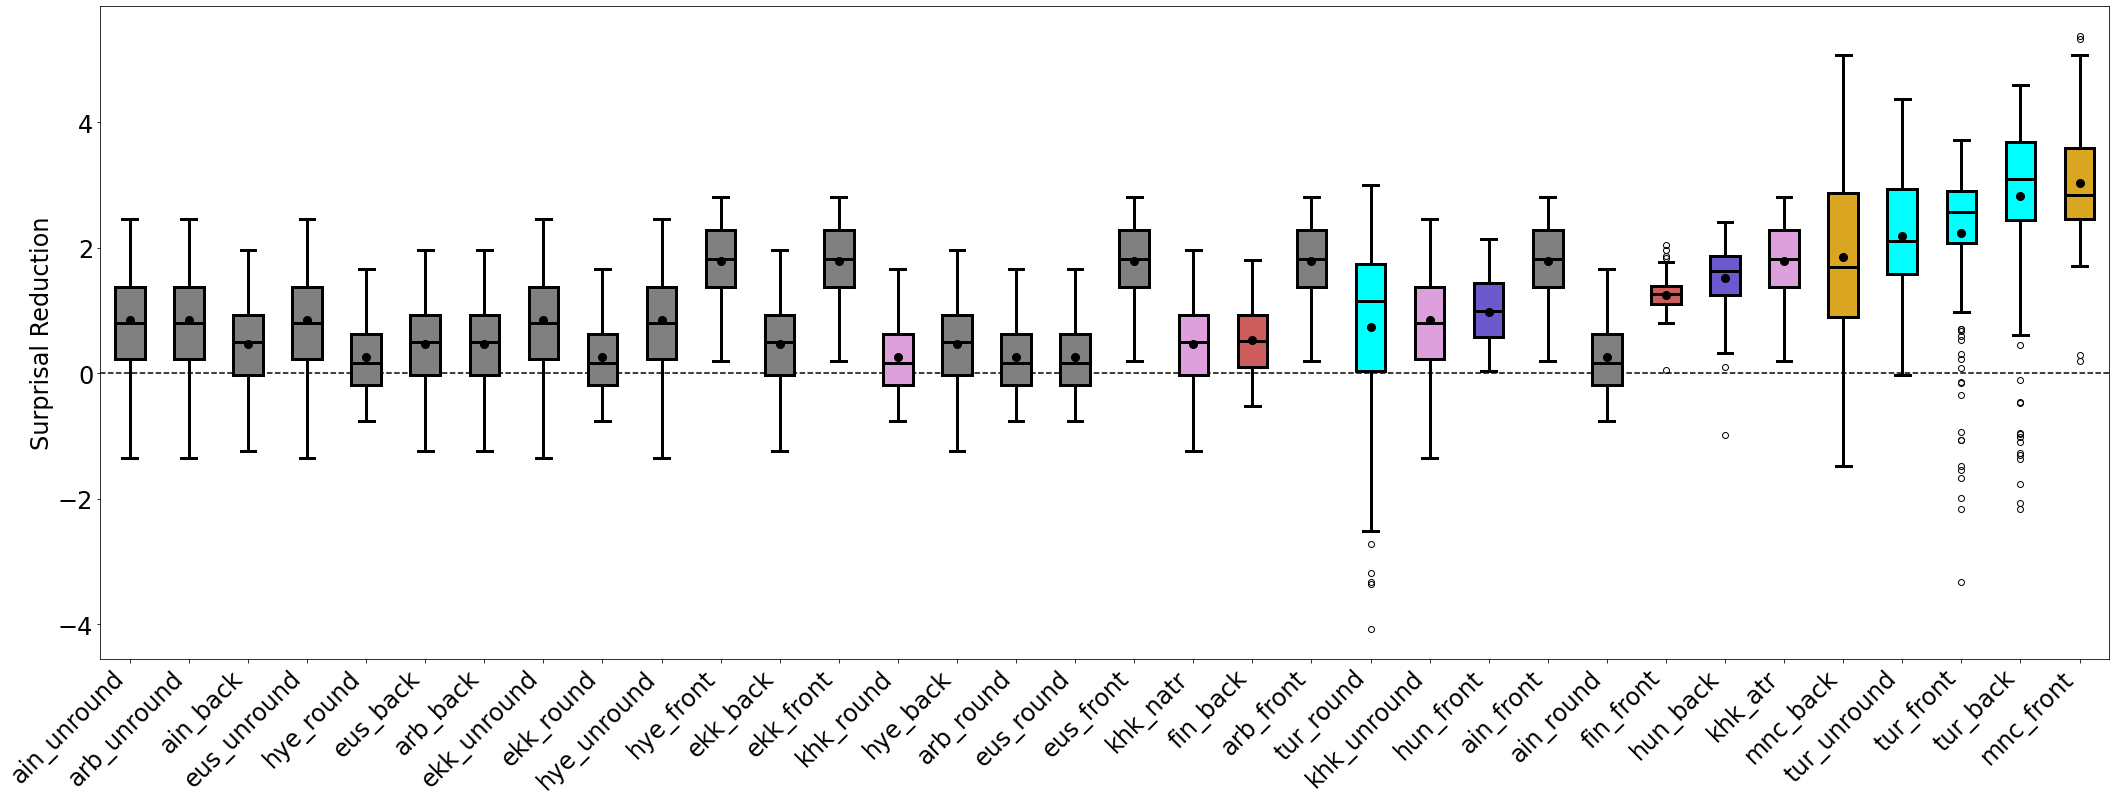

In [13]:
#ordering 
logodds_order = dict(sorted(logodds_order.items(), key=lambda item: item[1]))

fontsize=24

fig = plt.figure(figsize=(36, 12))
gs = fig.add_gridspec(1, 1, hspace=0.15, wspace=0.25)
ax = gs.subplots()

plt.axhline(y = 0.0, color = 'black', linestyle = '--')

xlabels = list(logodds_order.keys())

data = [logodds_dist[group] for group in logodds_order]


assert len(data) == len(xlabels) # suprisal distributions and number of conditions have to be identical.
bp = ax.boxplot(data, patch_artist=True, showmeans=True)
for element in ['boxes', 'whiskers', 'fliers', 'caps']:
    plt.setp(bp[element], color='black', linewidth=3)
for box, hg in zip(bp['boxes'], xlabels):
    box.set(facecolor=group2color[hg])
plt.setp(bp['medians'], linestyle='-', linewidth=3, color='black')
plt.setp(bp['means'], linestyle='-', marker='o', markerfacecolor='black', markeredgecolor='black',
    markersize=8)
ax.set_ylabel("Surprisal Reduction", fontsize=fontsize)
ax.tick_params(axis='y', labelsize=fontsize)
ax.set_xticklabels(xlabels, fontsize=fontsize, rotation=45, ha='right')
ax.set_title("", fontsize=fontsize)
plt.yticks(fontsize=fontsize)

plt.savefig("../img/logodds.png",
            bbox_inches='tight',
            pad_inches=0,
            format='png',
            dpi=300)